In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

# Polynomial & Regularization Notes


## Table of notation


| Symbol                     | Meaning                     | Symbol    | Meaning                                                          |
|----------------------------|-----------------------------|-----------|------------------------------------------------------------------|
| $\xv$ or $\vec{x}$         | feature/input vector        | $x_i$     | $i$th element of $\xv$                                           |
| $\Xm$                      | input matrix                | $x_{i,j}$ | $i$th row and $j$th column of $\Xm$                              |
| $\yv$ or $\tv$             | labels/targets              | $n$       | number of features or columns 
| $\wv$ or $\mathbf{\theta}$ | weight/parameter vector     | $m$       | number of data samples <br>(also used to refer to the slope) |samples or rows                                   |
| $f$ or $h$                 | hypothesis function <br> (i.e., a model)        | $\hat{\yv}$ <br> $f(\xv {;} \wv)$<br>$h(\xv {;} \wv)$ | predictions <br> y-hat |
| $E$              | error or sum of error (loss)  | $SSE$      | sum of squared error function                                            |
| $MSE$                      | mean squared error| $\nabla$  | gradient (nabla)                                       |
| $\partial$                 | partial derivative          | $\alpha$  | learning rate (alpha)                                  |       
| $J$ | general placeholder for <br>the objective function | $x^T$| transpose of a vector or matrix |
$b$ | bias or y-intercept term | $\cdot$ | dot product|
$*$| element-wise<br> multiplication | $\lambda$| regularization<br> variable |

## Linear regression review

Let's start by reviewing some core concepts we learned from linear regression as we'll need these concept moving forward. Recall, for linear regression, we use the sum of squared errors (SSE), mean squared error (MSE), root mean square error (RMSE) as cost/loss functions to measure our models fit where the higher the error the worse the model is doing. We used the MSE as our objective function (recall using MSE reduces to SSE when optimizing) to minimize the following equation to find the best fit and weights for our training data:

$$
J(\wv) = \min_\wv \frac{1}{m} \sum_{i=1}^{m} \Big( \hat{y_i} - y_i \Big)^2 
$$

We used two methods to minimize our MSE objective function: ordinary least squares and least mean squares. Ordinary least squares computes the exact solution and thus provides the weights that best fit our training data by using the following closed-form equation:
$$
\wv = \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \yv 
$$

Least means squares (LMS) attempts to iteratively approximate the weights that will produce a best fit by finding a mimima using gradient descent. LMS should converge to the same answer (weights) as OLS given enough time. Recall the update equation for our weights using gradient descent was given as follows:

$$
\begin{align}
\wv_{k+1} &=  \wv_{k} - \alpha \nabla J(\wv_{k}) \\
&= \wv_{k} - \alpha \Big( {\wv_{k}}^\top \xv_i - y_i \Big) \xv_i.
\end{align}
$$

where in this equation 
- $\wv_k$ represents our current weights.
- $\wv_{k+1}$ represents the updated weights after taking a gradient step. 


## Issues

Recall that linear regression is restricted to only fitting straight lines (i.e., linear data). What do we do when we have non-linear data? If we apply our linear model it will underfit our data (poor performance)! This is where polynomial regression comes into play! We can use the same equations above, however now we can apply simple non-linear transformations to our features using a non-linear function (polynomial in this case) to achieve non-linear regression!

Lastly, recall that one of the issues we noticed in the linear regression lab was that even if one model produces a lower training SSE/MSE/RMSE it might actually be worse because it will perform poorly on our unseen data (i.e., validation and test sets)! When our training error is lower than our validation/test error this is an indication that overfitting is occurring. We'll look at this how to reduce overfitting and also the ideas of underfitting more closely in this module.

Let's start off by looking at polynomial regression and then let's take a look at overfitting as polynomial regression presents overfitting in a very clear cut manner!

# Polynomial Regression

## Defining a Polynomial 
Before we dive into polynomial regression let's clarify what it is we mean by a "polynomial."

Recall that the definition of a polynomial is as follows:
>  Polynomial is an expression consisting of variables and coefficients, that involves only the operations of addition, subtraction, multiplication, and non-negative integer exponentiation of variables. 

Let's make this definition concrete by look at some examples:
- $8$
- $1 + 2x$
- $x^2$
- $1 + 2x + 4x^3$
- $22 + 2x+ x^3 + 9x^4$
- $4x^3 + 5y^2x^2 + 2yx$

We typically define a polynomial in terms of "degrees." Degrees refers to the largest exponent for a variable. For instance, if we take the above examples we can give each one of them a degree.

- Degree 0 (constant): $8$
- Degree 1 (linear): $1 + 2x$
- Degree 2 (quadratic): $x^2$
- Degree 3 (cubic): $1 + 2x + 4x^3$
- Degree 4 (quartic): $22 + 2x+ x^3 + 9x^4$
- Degree 4 (multi-variable quartic): $4x^3 + 5y^2x^2 + 2yx$
    - Note that for $ 5y^2x^2$, $x$ has a degree of 2 and $y$ has a degree of 2. We then add these degrees together to get 4. See the below reference and refer to the *Degree of a Polynomial with More Than One Variable* section for how to compute degree for multiple variables.

If you need additional review of polynomial equations see this [reference](https://www.mathsisfun.com/algebra/degree-expression.html).


## Applying Polynomials to Linear Regression
Recall that for linear regression, we make predictions by taking the linear combination of each features using the learned weights as follows:

$$
\begin{align}
\hat{y} &= w_0 +w_1 x_1 + ... +w_n x_n \\
\end{align}
$$

where we have $n$ features and $n$ weights. Take a close look our linear combination for predicting the target. Notice that it is a polynomial equation of degree 1! Polynomial regression's goal is to allow for an increase in the number of degrees beyond simply one. For instance, we might want to make a prediction using degree 2 as follows:

$$
\begin{align}
\hat{y} &= w_0 + w_1 x_1 +  w_2 x_1^2 + + w_3 x_2 + w_4 x_2^2 + ... + w_p x_n + w_p x_n^2\\
\end{align}
$$
where we have <u>$n$ original features</u> and <u>$p$ weights</u> where $p = n * \text{degree}$. For instance, if we had 3 features and applied degree 2 polynomial transform then we would end up with 6 <u>new features</u> and 6 weights (given we applied the transform to ALL our features).

The power of polynomial regression comes from the added degrees which introduces the ability to generate a line-of-best-fit that is curved (non-linear) instead of just straight! The idea of polynomial regression relates to approximating a graph with infinitely many polynomials or in another words [Taylor series expansion and approximation](https://www.khanacademy.org/math/ap-calculus-bc/bc-series-new/bc-10-14/v/visualizing-taylor-series-approximations). Thus, by adding more degrees, we gain more degrees of freedom that allow our model to fit more complex functions.

Polynomial regression works by simply transforming our input features using higher degree terms such square, cubic, quartic. The more degrees we add, the more features we will have after the transformation. 

For instance, if the original raw input $X$ is two dimensional and has features such as temperature $t$ and humidity $h$, the 3rd-degree polynomial transformation extends the dimension to six. Thus, our features would now be as follows: $(t, h, t^2, h^2, t^3, h^3)$.



### Curse of Dimensionality

However, adding more features isn't a net benefit. The more features we add, the more likely we are to overfit (more on this soon). This is because as features >> data samples (>> means significantly greater than), we start suffering from the Curse of Dimensionality. Meaning, to generalize to better to unseen data, we'll we need **exponentially** more data samples to account for the increase in features/dimensions. Intuitively, think about the Curse of Dimensionality like this. As the number of features grows we need more data in order for our model to determine which features and combination of features are important to making a good prediction. 

Take the below image for instance. As we increase the number of features, our model's performance increases until we reach the optimal number of features. Then, our model's performance starts to decrease due to having too many features which makes it difficult to find the "important" features.

<img src="https://miro.medium.com/max/514/1*-mwVN1CEejZTEJL8nifzmw.png" width=500 height=500>

Let's now take a look at an actual polynomial regression example to make things more concrete!

## Polynomial Regression Example

First let's start off by making some toy data that has 100 data samples. Our output $y$ will be determined by the following polynomial equation: 
$$
y = 2 + x + \frac{1}{2}x^2.
$$

We'll also add some uniform random noise to each data sample to make things a little harder as follows:

$$
y = (2 + x + \frac{1}{2}x^2) + \text{Unif}[0, 1)
$$

In [ ]:
m = 100 # data samples
rng = np.random.RandomState(42)
X = np.sort(6 * rng.rand(m, 1) - 3, axis=0)

# 2 + X + .5X^2 + random noise
y = (2 + .5* X**2 + X) + rng.rand(m, 1)

In [ ]:
y.shape

(100, 1)

Our data turns out to look something like the below plot. A nice smooth check mark like shape - nice and non-linear!

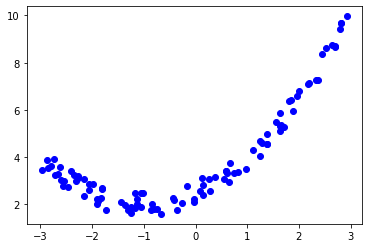

In [ ]:
plt.plot(X, y, 'ob')

With our face data we can now import sklearn's `PolynomialFeatures` class which will automatically apply the exponentials to our features up to a given degree.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

We can transform our features simply by passing the degree we want, in this case 2, to the `PolynomialFeatures` class when we are initializing it. Next, we simply call the `fit_transform()` method to create our new features! 

In [ ]:
degree = 2
poly_feat = PolynomialFeatures(degree=degree)
poly_X = poly_feat.fit_transform(X)

Let's take a look at the shape of our new data.

In [ ]:
poly_X.shape

(100, 3)

Notice that we have gain 2 new features! Wait a second...shouldn't we have only gain 1 new features? Recall that we started off with $x$ and that we are using degree 2, thus we should only be adding an additional quadratic $x^2$ term. Let's call the `get_feature_names_out()` method on `poly_feat` instance variable to see what our feature names are.

In [ ]:
poly_feat.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

Ahhhh, notice that the `PolynomialFeatures` class not only added our quadratic $x^2$ but also added a bias term for us. So that extra 3rd feature is just the bias term which has been automatically applied to our data for us!

Take a look at the transformed data below. Notice, **the 1st column is the bias (just ones), the 2nd column is our original data $x$, and the 3rd column is the $x^2$.**

In [ ]:
pd.DataFrame(poly_X, columns=poly_feat.get_feature_names_out())

,1,x0,x0^2
0,1.0,-2.966867,8.802302
1,1.0,-2.876493,8.274212
2,1.0,-2.847485,8.108172
3,1.0,-2.793669,7.804586
4,1.0,-2.728636,7.445456
...,...,...,...
95,1.0,2.704286,7.313162
96,1.0,2.793792,7.805275
97,1.0,2.817508,7.938350
98,1.0,2.819459,7.949350


Using our new polynomial input features `poly_X`, let's try to find the line-of-best-fit using ordinary least squares! Below is the `OrdinaryLeastSquares` class we define in the linear modeling lab.

In [ ]:
class OrdinaryLeastSquares():
    def __init__(self):
        self.w = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self.w = np.linalg.pinv(X.T @ X) @ X.T @ y
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        return X @ self.w

In [ ]:
ols = OrdinaryLeastSquares()
ols.fit(poly_X, y)
preds = ols.predict(poly_X)

As we can see, with degree 2 we can practically recover the original function that was used to determine our $y$ values!

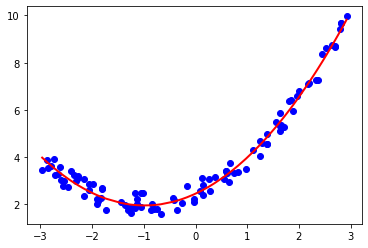

In [ ]:
plt.plot(X, y, 'ob')
plt.plot(X, preds, '-r', linewidth=2)
plt.show()

If we take a look at our weights we learned for $y = w_0 b + w_1 x_1 + w_2 x_1^2$ we can see how close our the learned line-of-best-fit is to the original equation $y = (2 + x + \frac{1}{2}x^2) + \text{Unif}[0, 1)$. 

In [ ]:
ols.w

array([[2.45044143],
       [1.01545693],
       [0.51574182]])

Notice that our bias $w_0$ is $2.45044143$ which was original $2$, our $x$ weight $w_1$ is equal $1.01545693$ which was originally 1, and our $x^2$ weight i $w_2$ is equal to $0.51574182$ which was originally $\frac{1}{2}$. The only reason we haven't learned the exact coefficients is because we added some noise to our data!

When we know exactly how many degrees our original function has the solution is trivial. However, in real world scenarios we don't know the underlining function for our labels/targets. Let's look at what happens when we specify too simple of a model (too few degrees) and what happens when specify too complex of a model (too many degrees).

# Underfitting (High Bias) vs Overfitting (High Variance) 

One common problem you'll face when fitting machine learning models is either underfitting or overfitting to your data. A your model is most likely overfitting when it achieves a very low training error but receives a high validation or test error. The opposite problem occurs when your model fails to learn from the training data such that it receives very high training error and a high validation/test error.

This idea of underfitting and overfitting has theoretical implications that relate to the fact that a model's error can be mathematically broken down into three parts: bias, variance, and irreducible error. We won't dive into the math here but rather provide an high-level overview these components.

- Bias
    > This part of a model's error is due to **wrong assumptions**, such as assuming that the data is linear when it is actually quadratic. Thus, our chosen model is too simple! A high-bias model is most likely to *underfit* the training data.

- Variance
    > This part of the error is due to the model's excessive sensitivity to **small variations in the training data**. A model with too many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to *overfit* the training data.

- Irreducible error
    > This part of the error is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).
    
Given these definitions, a model with high bias is likely to underfit the training data, while a model with high variance is likely to overfit the training data. Typically if we are underfitting, we want to decrease the bias by increasing the model's variance. We can do this by simply increasing the complexity of the model (i.e., increasing the degrees in polynomial regression). Conversely, we can reduce a model's variance by increasing its bias. This is done by using a simpler model (i.e., reducing the number of degrees in polynomial regression). **Our goal is then to balance this bias-variance trade-off by finding a model that is not too complex but not too simple - as seen in the below image!**

<img src="https://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png" width=400, height=400>

The below image provides a good visual summary of bias and variance. We can think of the bullseye as being the point where would model would best fit out training data and produce a low generalization error. Each blue dot can then be thought of as a data sample prediction where the lower the generalization error the closer it is too the bullseye.
    
    
  <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.e3BHd3_iwG_4llsafeHCHAHaGt%26pid%3DApi&f=1" width=350, height=350>

Let's take a look at some examples of both high bias (underfitting) and high variance (overfitting) models using polynomial regression. Below we define some functions to help us quickly create our polynomial features, run our ordinary least squares algorithm, and plot our results.

If you have any questions about the below code feel free to ask on Campuswire!

In [ ]:
from matplotlib.gridspec import GridSpec
# keep numpy from using scientific notation
np.set_printoptions(suppress=True)

def run_poly_model(
    X_trn: np.ndarray, 
    y_trn: np.ndarray, 
    X_tst: np.ndarray, 
    y_tst: np.ndarray, 
    degree: int
) -> np.ndarray:
    """Train an OLS model using polynomial features"""
    # Compute poly features
    poly_feat = PolynomialFeatures(degree=degree)
    poly_X_trn = poly_feat.fit_transform(X_trn)
    poly_X_tst = poly_feat.transform(X_tst)
    
    # Run OLS training and evaluation
    ols = OrdinaryLeastSquares()
    ols.fit(poly_X_trn, y_trn)
    preds_trn = ols.predict(poly_X_trn)
    preds_tst = ols.predict(poly_X_tst)

    return poly_X_trn, preds_trn, poly_X_tst, preds_tst, ols, poly_feat

def mse(y: np.ndarray, preds: np.ndarray) -> np.ndarray:
    """Compute MSE"""
    err =  preds - y 
    return np.mean(err**2)

def run_and_plot(
    X_trn: np.ndarray, 
    y_trn: np.ndarray, 
    X_tst: np.ndarray, 
    y_tst: np.ndarray, 
    degree: int
) -> np.ndarray:
    """ Plot the results of a trained OLS model using polynomial features"""
    # Train model and compute predictions
    outputs = run_poly_model(X_trn, y_trn, X_tst, y_tst, degree=degree)
    poly_X_trn, preds_trn, poly_X_tst, preds_tst, ols, poly_feat = outputs
    trn_mse = mse(y_trn, preds_trn)
    tst_mse = mse(y_tst, preds_tst)
    
    # Print Info
    print(f"Train MSE: {trn_mse}")
    print(f"Test MSE: {tst_mse}")
    print(f"degree: {degree}")
    print(f"X feature names: {poly_feat.get_feature_names_out()}")
    print(f'weight values: {ols.w.flatten()}')
    
    # plotting
    # Create a sub-plot (multiple plots in one)
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2,2) # 2 rows, 2 columns
    ax1 = fig.add_subplot(gs[0,0]) 
    ax2 = fig.add_subplot(gs[0,1]) 
    ax3 = fig.add_subplot(gs[1,:])
    
    # Plot train data
    ax1.plot(X_trn, y_trn, 'ob')
    # Plot line-of-best-fit
    ax1.plot(X_trn,preds_trn, '-r', linewidth=2)
    ax1.set_title(f"Training Predictions - degree {degree} - MSE {trn_mse}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('y')
    
    # Plot train data
    ax2.plot(X_tst, y_tst, 'og')
    # Plot line-of-best-fit
    ax2.plot(X_tst, preds_tst, '-r', linewidth=2)
    ax2.set_title(f"Testing Predictions with degree {degree} - MSE {tst_mse}")
    ax2.set_xlabel('X')
    ax2.set_ylabel('y')
    
    # Plot train and test data
    ax3.plot(X_trn, y_trn, '.b')
    ax3.plot(X_tst, y_tst, '.g')
    # Plot line-of-best-fit
    ax3.plot(np.vstack([X_trn, X_tst]), np.vstack([preds_trn, preds_tst]) , '-r', linewidth=2)
    ax3.set_title(f"Training + Testing Predictions with degree {degree}")
    ax3.set_xlabel('X')
    ax3.set_ylabel('y')
    
    return outputs

In order to visualize high bias and high variance we need to split our data into a training and test set. Below we do a 60-40 split for exploratory purposes only.

In [ ]:
X_trn = X[:60]
y_trn = y[:60]

X_tst = X[60:]
y_tst = y[60:]

In [ ]:
print(f"X_trn shape: {X_trn.shape}")
print(f"X_tst shape: {X_tst.shape}")

X_trn shape: (60, 1)
X_tst shape: (40, 1)


## Underfitting and High Bias
Below is an example of underfitting using a linear model. Recall that polynomial regression with degree 1 just performs normal linear regression. 

- How to read the plots
    - **colors**
        - **blue** corresponds to training data
        - **green** corresponds to testing data
        - **red** corresponds to the line-of-best-fit
    - **top left plot**
        - The graph in the top left shows our training data with the line-of-best-fit plotted in red.
    - **top right plot**
        - The graph in the top right shows just our testing data with the line-of-best-fit learned from the training data plotted in red.
    - **bottom plot**
        - The graph in the bottom shows ALL our data (both the training and testing sets combined) with the line-of-best-fit plotted in red.
    - **weights**
        - The weights for each model are printed about the graph above with the names of the features.
    - **MSE**
        - The is reported in the title of the training graph (top left) and testing graph (top right) and above the plots via print statements.

Notice that the model can't really learn the data using only a linear model. The model tries it's best to find a line-of-best-fit (i.e., weights) that minimize the MSE/SSE. However, when new data is introduced we can see that the model fails very badly and completely misses the trend of the data.

Notice our train error is slightly high but are test error is massive in comparison!

Train MSE: 0.2711536914340481
Test MSE: 24.39218006722166
degree: 1
X feature names: ['1' 'x0']
weight values: [ 2.1153995  -0.31758429]


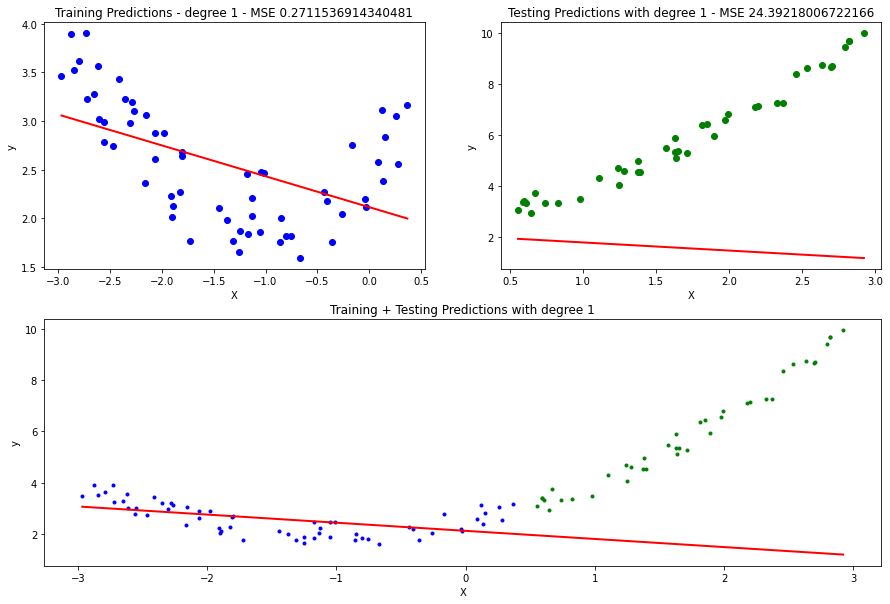

In [ ]:
run_and_plot(X_trn, y_trn, X_tst, y_tst, degree=1);

## Overfitting and High Variance

Below of different examples of overfitting using higher and higher degrees of polynomials. Recall our $y$ labels are generated using a polynomial of degree 2. Let's see what happens when we use higher degrees.

### Degree 4
Here even with a degree of 4 we can see the our model receives a very small training MSE and our test MSE is greatly reduced when compared to the above linear model. 

However, we can see visually that the model starts to overfit to the to training data as the line-of-best-fit curves up too fast and completely fails to fit the testing data as indicated by the test MSE.

So before we were underfitting and now we are overfitting. However, both models were represented by a "low" training error (when compared to the testing error) and "higher" testing error. Without the visualizations, how could we tell? Well, first notice that underfitting is indicated by a "high" training and a "high" testing error. However, determining what is considered low or high is dependent on the data and problem at hand. If we take a closer look when we compare the errors for the linear model and the model with degree 4 we can see the linear model has a high training error and a extremely high testing error while the model with degree 4 has a really small training error and a high testing error. Only when comparing the errors across different models can we really gain any insight into which models are overfitting or underfitting.

Later, in the semester we'll look at other methods for determining if underfitting or overfitting is occurring by using learning curves. For now, we'll keep to this simplistic and naive methods of observing the error and line-of-best-fit.


Train MSE: 0.08215400107502761
Test MSE: 3.013701609180108
degree: 4
X feature names: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4']
weight values: [ 2.4755966   1.29138962  0.78939966  0.03445469 -0.01248492]


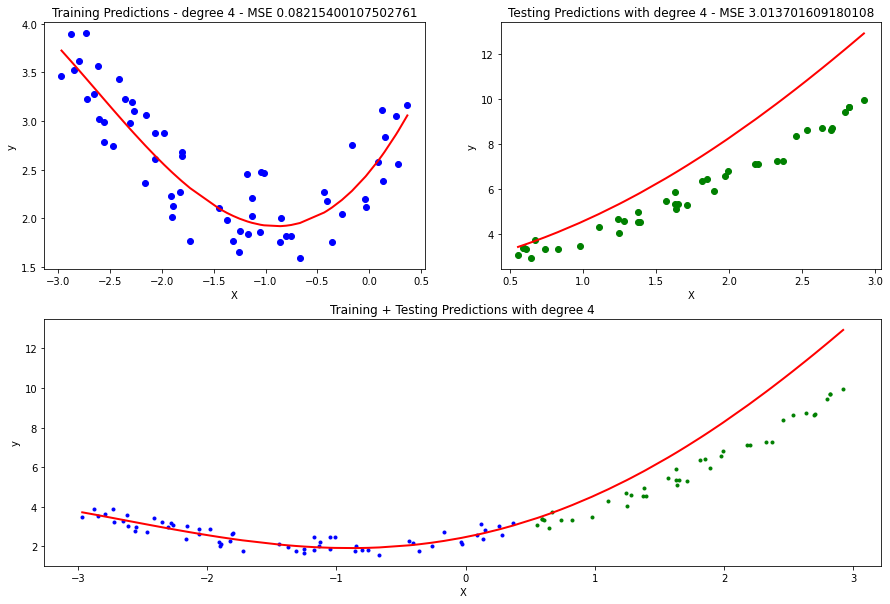

In [ ]:
run_and_plot(X_trn, y_trn, X_tst, y_tst, degree=4);

### Degree 6
Here with a degree of 6 we can start to see things get really out of hand. Notice in the top left plot (the training data plot) we can see the line-of-best-fit start trying to fit each individual point. This is a prime example of overfitting. We can clearly see that using too many degrees here means the model starts to "memorize" the data and begins to *fit to the noise of the data instead of finding the general trend*. Our model can do this specifically because it has too many degrees of freedom to work with, meaning it can more easily fit the training data exactly.

If we look at the test set in the top right and bottom graphs we can see the model making a weird line-of-best-fit. This is the idea of "high variance". Notice that near the start of the testing data the line-of-best-fit is close but as it continues it starts go off into no where. Thus, there is a high-variance in predictions for the test set making things very unstable and unreliable.

Train MSE: 0.08136268262621235
Test MSE: 8.504042925215638
degree: 6
X feature names: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6']
weight values: [ 2.44572168  1.34187839  1.17396067  0.36854934 -0.00946497 -0.06716352
 -0.01503633]


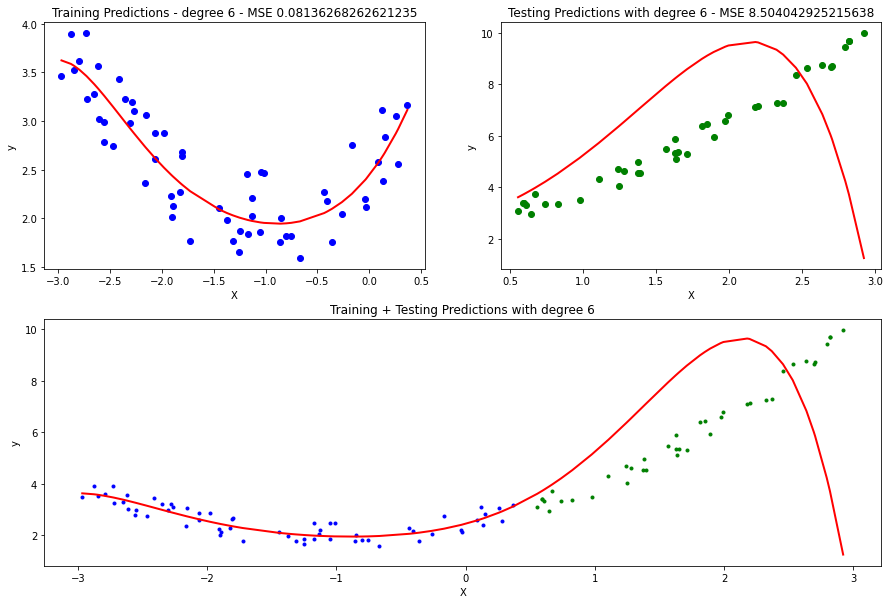

In [ ]:
run_and_plot(X_trn, y_trn, X_tst, y_tst, degree=6);

### Degree 15
This idea of "high variance" can be even more clearly seen when we use 15 degrees. Notice how the line-of-best-fit is now clearly trying to fit to every training data sample. Now when it tries to fit the testing data it becomes extremely unstable and produces predictions that don't even make sense!

Train MSE: 0.07161249649703741
Test MSE: 17200292793.24975
degree: 15
X feature names: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10'
 'x0^11' 'x0^12' 'x0^13' 'x0^14' 'x0^15']
weight values: [ 2.4719875   1.44516132  0.56055512 -0.33755013  0.37742678 -0.11070979
 -0.13653713  0.2974595  -0.22501096 -0.06035155  0.29331626 -0.08859608
 -0.33973191 -0.19214933 -0.04428732 -0.00376208]


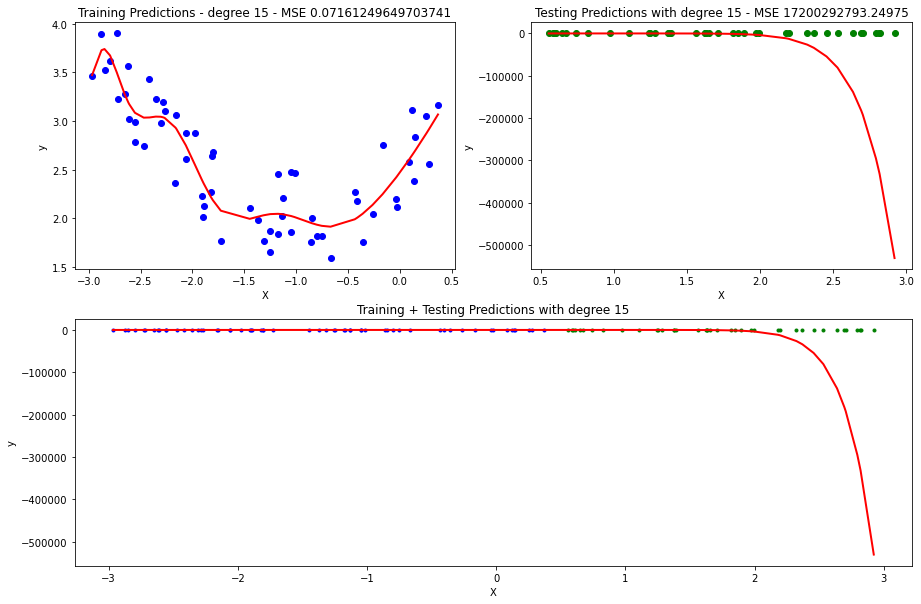

In [ ]:
run_and_plot(X_trn, y_trn, X_tst, y_tst, degree=15);

## **Balancing Bias and Variance**

Below are examples of a balance between the bias-variance trade-off.

### Degree 2

Recall that the original data was made using a 2 degree polynomial. This means a model with 2 degrees should fit our data the best! As we can see, our 2 degree model almost perfectly matches the trend, as we might expect!

Next, notice that the training and testing MSE are both almost the same (very low)!

Also notice that the learned weights are relatively close to the underlying equation $y = (2 + x + \frac{1}{2}x^2) + \text{Unif}[0, 1)$ that generated the data.

Train MSE: 0.08724971208689959
Test MSE: 0.08627510130504015
degree: 2
X feature names: ['1' 'x0' 'x0^2']
weight values: [2.4818788  0.9911323  0.49807269]


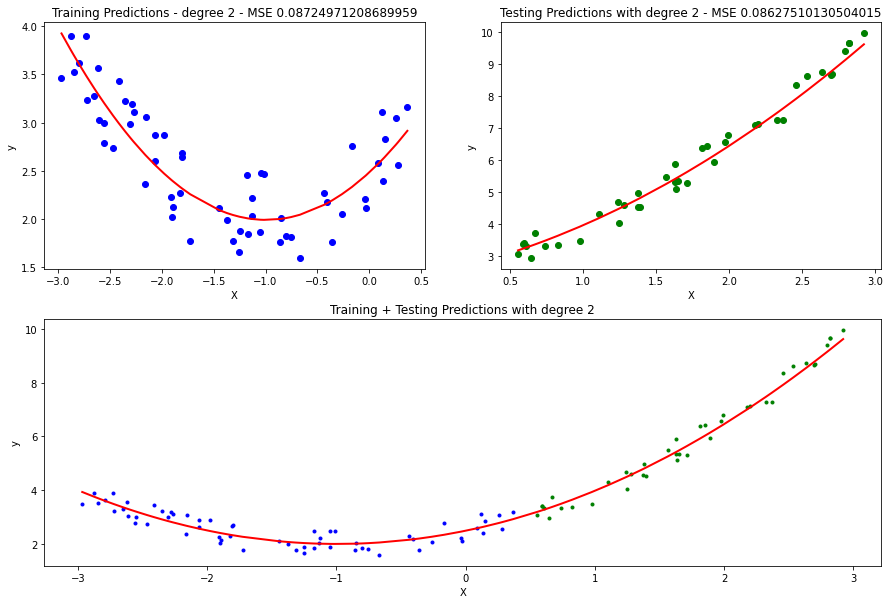

In [ ]:
run_and_plot(X_trn, y_trn, X_tst, y_tst, degree=2);

## Reducing vs increasing degrees

As mentioned, we don't have the luxury of knowing how many degrees our a targets $y$ underlying function has. Thus, in practice we have to **treat the number of degrees for polynomial regress as a hyperparameter** that we have to learn through trial-and-error (training our model with a given degree and then evaluating it using a validation set). If we see our model is overfitting by having a low training error and a high testing error, then we have to use less degrees. If we see we have a high training error and a even higher testing error we need to add degrees.  

In practice, overfitting is a far larger and more common issue than underfitting. Thus, one approach encourage our models to learn a "simpler" model (even when using a larger number of degrees) by utilizing regularization.

# Regularization 

*Regularizing* is the practice of taking a complex model and simplifying it so that the model overfits less. As already seen, one way to regularize a model is to decrease the complexity of the model. In terms of polynomial regression, this means decreasing the degrees of freedom.

That being said, the term *regularization* in machine learning typically refers to the  constraining the values of the weights for a given model. We do so by introducing a new **penalty term** into the cost function we want to minimize. This penalty aims to increase the error when the values of the weights are large. This means, the model can only achieve a low error by having small weights that also minimize the chosen cost function. Thus, we are encouraging the model to learn small values for the weights that also achieve the goal of the cost function like minimizing the sum of the square error. 

But why is having large weights a problem? There are roughly two issues here.

1. Having unconstrained weight values further increases our models degrees of freedom (i.e., the model space or space of possible models). Having a model space means there are more potential models that can overfit to our training data.

By constraining our weights to be small, this reduces the space of potential values our weights can take on (i.e., the model space is reduced). Thus, you can think about it this way. If our weights can take on any values, they are easily overfit to the training data by finding a specific value that only works for the training data. However, if our weights are constrained such that they have to remain "small", our model is less likely to overfit by finding weight values that only work for our training data.


2. Having large weights makes our weights *more sensitive to small changes* in the input features.

As you will see soon, having large weights makes our models sensitive to small changes in our input features where these small changes are likely due to noise. Thus, we typically want our weights to be smaller. Recall that we multiply our weights by a given feature value. Thus, if our weight is large, even a small change in the input will cause large changes in the output. This is just nature of multiplication, meaning a larger number multiplied by another number will lead to higher variation, compared to a smaller number multiplied by the same number (see below example). 



In [ ]:
def multiplication_sensitivity(n1, n2, n_list):
    n1_prods = []
    n2_prods = []
    for n in [n1, n2]:
        prods = []
        print(f"Products of {n} with {n_list}")
        for i in n_list:
            product = n * i
            prods.append(product)
            print(f"\t{n} * {i} = {product}")
        
        print("\n"+"-"*40)
        print(f"\tmean: {np.mean(prods)}")
        print(f"\tstd: {np.std(prods)}\n")

In [ ]:
multiplication_sensitivity(n1=1000, n2=10, n_list=[.3, .5, .9])

Products of 1000 with [0.3, 0.5, 0.9]
	1000 * 0.3 = 300.0
	1000 * 0.5 = 500.0
	1000 * 0.9 = 900.0

----------------------------------------
	mean: 566.6666666666666
	std: 249.44382578492943

Products of 10 with [0.3, 0.5, 0.9]
	10 * 0.3 = 3.0
	10 * 0.5 = 5.0
	10 * 0.9 = 9.0

----------------------------------------
	mean: 5.666666666666667
	std: 2.494438257849294



Above, notice that the large number leads to a much large mean and standard deviation. This shows that larger numbers multiplied by the same number as small numbers leads to a high variation in outputs. A similar idea as this applies to weights as well!

Let's look at one type of regularization to help make this idea more concrete.

## **Ridge Regression** and the L2 Norm

Ridge regression refers to performing linear or polynomial regression with the L2 Norm of our weights $\lVert \wv \rVert_2^2$ added to our cost function. Recall that the L2 Norm is defined as follows:

$$
\lVert \wv \rVert_2 = \sqrt{w_1^2 + w_2^2 + ... + w_n^2}
$$

However, we will be using the square of the $||\wv||_2$ denoted as $||\wv||_2^2$. All this does is cancel out the square root in the L2 making it so we are taking the sum of squares.

$$
\lVert \wv \rVert_2^2 = \big (\sqrt{w_1^2 + w_2^2 + ... + w_n^2} \, \big )^2 = w_1^2 + w_2^2 + ... + w_n^2
$$

Recall, we want to punish larger weights regardless of the sign (negative or positive), thus we use the $||\wv||_2^2$ norm which squares our weight values. Thus, the  $||\wv||_2^2$ norm allows us to punish larger weights more significantly than smaller weights (due to properties of how squaring a number works) while also making sure we are indifferent to whether a weight is positive or negative. We can integrate $\lVert \wv \rVert_2^2$ into our MSE cost function by simply adding the term to our MSE cost equation as follows:

$$
J(\wv) = \min_\wv \frac{1}{m} \sum_{i=1}^{m} \Big( f(\xv_i; \wv) - \hat{y}_i \Big)^2 + \lambda \lVert \wv \rVert_2^2
$$

where $\lambda$ (the Greek symbol called *lambda*) is a hyperparameter called the regularization term which scales how much the $\lVert \wv \rVert_2^2$ norm affects the cost function. If $\lambda = 0$, we simply have normal linear or polynomial regression. The higher the value of $\lambda$, the greater the influence $\lVert \wv \rVert_2^2$ has on our cost function. If $\lambda$ is too high it can cause our model to become too constrained and too simple, leaving our line-of-best-fit as a simple flat line.

**Further, we do not typically regularize our bias weight (i.e., $w_0$) as we don't want to limit the model's ability to move up and down the y-intercept!**



Recall, we originally defined the "best fit" as the fit that produces the lowest error. In other words, the lowest mean squared error (MSE). However, with the regularization term, we define "best fit" as the fit that minimizes both the MSE and L2 regularization. Thus, our algorithm must optimize for two different factors: minimizing the error and keeping the weight values small. 

<!-- The optimization of these two factors is represented visually in the bellow image. Note that the "best fit" is where the gray circle (the weights that minimize just the L2 norm) and the non-gray circle (the weights the minimize just the MSE) intersect.

<img src="http://rasbt.github.io/mlxtend/user_guide/general_concepts/regularization-linear_files/l2.png" width=500 height=500> -->

Using ordinary least squares we can rederive the closed form solution with the regularization $\lVert \wv \rVert_2^2$ term factored in.
$$
\begin{align*}
J(\wv) &=  \sum_{i=1}^{m} ( \hat{y}_i - y_i)^2 + \lambda \sum_{j=1}^n w_j^2 \tag{1a} \\
  \\
  &= \frac{1}{m} ( \hat{\yv} - \yv)^2 + \lambda \lVert \wv \rVert_2^2 \tag{1} \\
  \\
  &= (\Xm \wv - \yv)^\top (\Xm \wv - \yv)  + \lambda \wv^\top \wv \tag{1b} \\
  \\
 &= \wv^\top \Xm^\top \Xm \wv -\wv^\top \Xm^\top \yv - \yv^\top \Xm \wv - \yv^\top \yv + \lambda \wv^\top \wv  \tag{1c}\\
  \\
  &= \wv^\top \Xm^\top \Xm \wv - 2 \wv^\top \Xm^\top \yv + \yv^\top \yv  + \lambda \wv^\top \wv \tag{1d}
\end{align*}
$$

Repeating the derivation as in linear regression, we can get the gradient

$$
\begin{align*}
\frac{\partial J(\wv)}{\partial \wv} &= \frac{\partial (\wv^\top \Xm^\top \Xm \wv - 2 \wv^\top \Xm^\top \yv + \yv^\top \yv  + \lambda \wv^\top \wv )}{\partial \wv} \tag{2}\\
        \\
        &= 2 \Xm^\top \Xm \wv - 2 \Xm^\top \yv + 2 \lambda \wv \tag{2a}
\end{align*}
$$

Setting the last term zero, we reach the solution of *ridge regression*: 


$$
\begin{align*}
 2 \Xm^\top \Xm \wv - 2 \Xm^\top \yv  + 2 \lambda \wv &= 0 \tag{3}\\
\\
 \Xm^\top \Xm \wv - \Xm^\top \yv  + \lambda \wv &= 0 \tag{3a}\\
\\
\Xm^\top \Xm \wv  + \lambda \wv &= \Xm^\top \yv \tag{3b} \\
\\
\big(\Xm^\top \Xm + \lambda \Im \big) \wv &= \Xm^\top \yv \tag{3c} \\
\\
\wv &= \big(\Xm^\top \Xm + \lambda \Im \big)^{-1} \Xm^\top \yv \tag{3d}
\end{align*}
$$

The ridge regression has the regularization term $\lambda$, which is the only difference from the previous least square solution. This simple addition helps to relieve overfitting by producing a simpler solution and hopefully a more generalizable one.

<!-- Note that we have  $\lambda \Im$ in Eq 3c because in Eq. 3b we factor out the weight $\wv$. As $\wv$ is a vector we have to leave a identity matrix behind. Recall if we factored out a variable in normal algebra we leave behind 1. In linear algebra this is the same idea but we leave behind a $I$.  -->
Recall an identity matrix is an empty matrix where the main diagonal is all 1's. Here, identity matrix $I$ is a $n \times n$ identity matrix where $I_{0,0}$ corresponds to bias feature, $I_{1,1}$ corresponds to our first feature, and $I_{n,n}$ corresponds to our last feature. Normally, we set the bias term $I_{0,0}$ to zero such that it isn't affected by the regularization.

### Code
Below we redefine some of our previously use functions and classes to adjust them to use ridge regression. Notice that in the we `RidgeRegression.fit()` method we set the first index of the identity matrix below to 0 so that we DO NOT regularize our bias term.

In [ ]:
class RidgeRegression():
    def __init__(self, lamb=0):
        self.lamb = lamb
        self.w = None
        
    def fit(self, X, y):
        I = np.eye(X.shape[1])
        # We set the bias term equal to 0
        # as we don't want to regularize the bias (typically)
        I[0, 0] = 0
        self.w = np.linalg.pinv(X.T @ X + self.lamb * I) @ X.T @ y
    
    def predict(self, X):
        return X @ self.w

In [ ]:
def run_ridge_poly_model(
    X_trn: np.ndarray, 
    y_trn: np.ndarray, 
    X_tst: np.ndarray, 
    y_tst: np.ndarray, 
    degree: int,
    lamb: float
) -> np.ndarray:
    """Train an ridge regression model using polynomial features"""
    poly_feat = PolynomialFeatures(degree=degree)
    poly_X_trn = poly_feat.fit_transform(X_trn)
    poly_X_tst = poly_feat.transform(X_tst)
    
    ols = RidgeRegression(lamb)
    ols.fit(poly_X_trn, y_trn)
    preds_trn = ols.predict(poly_X_trn)
    preds_tst = ols.predict(poly_X_tst)

    return poly_X_trn, preds_trn, poly_X_tst, preds_tst, ols, poly_feat

def run_ridge_and_plot(
    X_trn: np.ndarray, 
    y_trn: np.ndarray, 
    X_tst: np.ndarray, 
    y_tst: np.ndarray, 
    degree: int,
    lamb: float,
) -> np.ndarray:
    """ Plot the results of a trained ridge regression model using 
        polynomial features
    """
    outputs = run_ridge_poly_model(X_trn, y_trn, X_tst, y_tst, degree=degree, lamb=lamb)
    poly_X_trn, preds_trn, poly_X_tst, preds_tst, ols, poly_feat = outputs
    trn_mse = mse(y_trn, preds_trn)
    tst_mse = mse(y_tst, preds_tst)
    
    print(f"Train MSE: {trn_mse}")
    print(f"Test MSE: {tst_mse}")
    print(f"degree: {degree}")
    print(f"X feature names: {poly_feat.get_feature_names_out()}")
    print(f'weight values: {ols.w.flatten()}')
    
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2,2) # 2 rows, 2 columns
    
    ax1 = fig.add_subplot(gs[0,0]) 
    ax2 = fig.add_subplot(gs[0,1]) 
    ax3 = fig.add_subplot(gs[1,:])
    
    ax1.plot(X_trn, y_trn, 'ob')
    ax1.plot(X_trn,preds_trn, '-r', linewidth=2)
    ax1.set_title(f"Training Predictions - degree {degree} - MSE {trn_mse}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('y')
    
    ax2.plot(X_tst, y_tst, 'og')
    ax2.plot(X_tst, preds_tst, '-r', linewidth=2)
    ax2.set_title(f"Testing Predictions with degree {degree} - MSE {tst_mse}")
    ax2.set_xlabel('X')
    ax2.set_ylabel('y')
    
    ax3.plot(X_trn, y_trn, '.b')
    ax3.plot(X_tst, y_tst, '.g')
    ax3.plot(np.vstack([X_trn, X_tst]), np.vstack([preds_trn, preds_tst]) , '-r', linewidth=2)
    ax3.set_title(f"Training + Testing Predictions with degree {degree}")
    ax3.set_xlabel('X')
    ax3.set_ylabel('y')
    
    return outputs

## Testing different lambda values


### Degree 3

Let's take a look at applying different values of lambda to control our regularization for polynomial regression using 3 degrees.   

#### Lambda = 0  
First let's set lambda equal to 0 and use a degree of 3 to set a baseline. Notice that when using 3 degrees our OLS algorithm overfits as we have a low training error and high testing error. Visually, we can see the line-of-best-fit completely miss the testing data. Let's see if we can't fix this by constraining the value of our weights higher values for $\lambda$.

Train MSE: 0.08220891105152896
Test MSE: 10.567887098071157
degree: 3
X feature names: ['1' 'x0' 'x0^2' 'x0^3']
weight values: [2.4668134  1.32669721 0.89189483 0.10093447]


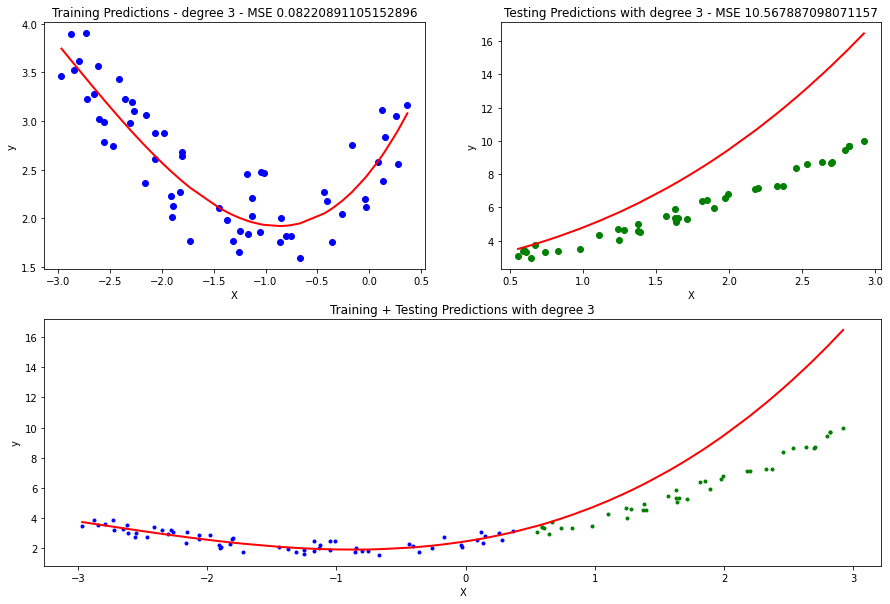

In [ ]:
run_ridge_and_plot(X_trn, y_trn, X_tst, y_tst, degree=3, lamb=0);

#### Lambda = .1

Now let's try a lamda value of .1. Visually, the overfitting looks just as bad as our baseline. However, notice the test MSE has shrunk. Additionally, pay attention to the values of all the weights. As we can see, all the weight values have been slightly reduced, except for bias which isn't being regularized! 

Train MSE: 0.08256468576212131
Test MSE: 5.56145220325466
degree: 3
X feature names: ['1' 'x0' 'x0^2' 'x0^3']
weight values: [2.46084817 1.22028755 0.78816949 0.07665194]


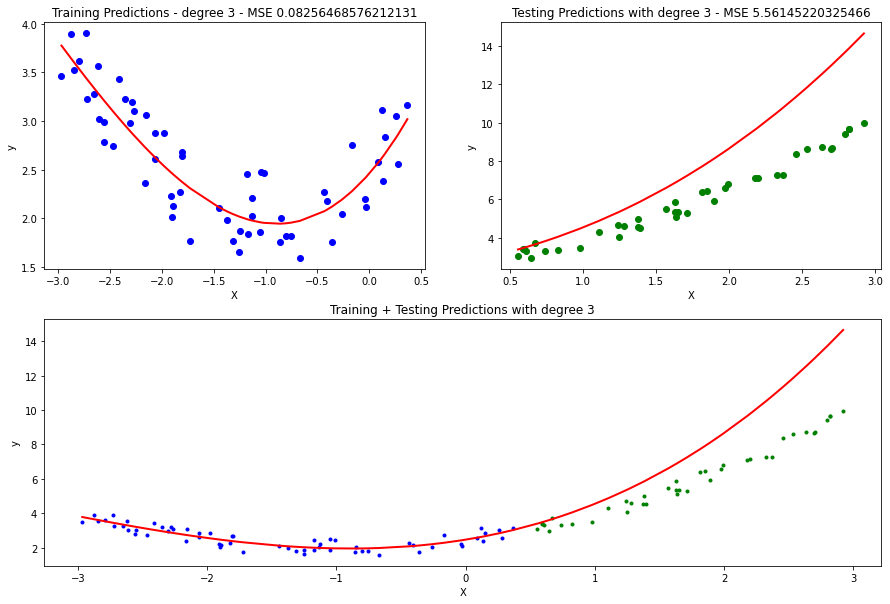

In [ ]:
run_ridge_and_plot(X_trn, y_trn, X_tst, y_tst, degree=3, lamb=.1);

#### Lambda = .5

Using a lambda value of .5 shows a much bigger difference. Take look at the weights below. Now both the train MSE and test MSE are almost the same! Further, notice that all the weights have shrunk even more!

Once again, notice how close the first 3 terms are to the original equation $y = (2 + x + \frac{1}{2}x^2) + \text{Unif}[0, 1)$ which generated the data. We can see the 4th term 'x0^3' is set to a small weight to limit its impact.

Train MSE: 0.08685647704006523
Test MSE: 0.07203251083460033
degree: 3
X feature names: ['1' 'x0' 'x0^2' 'x0^3']
weight values: [2.44356255 0.94102201 0.518757   0.01391954]


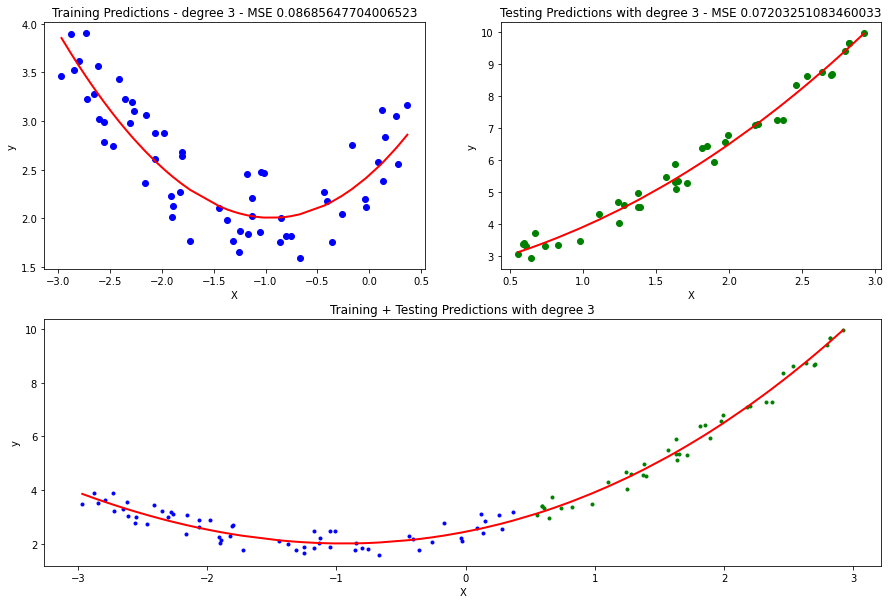

In [ ]:
run_ridge_and_plot(X_trn, y_trn, X_tst, y_tst, degree=3, lamb=.5);

Our weights are actually very close to the weights we had for our degree 2 polynomial which fit our model perfectly as was to be expected! Below are the recomputed weights for polynomial regression using degree 2 so you can compare! 

In [ ]:
_, _, _, _, ols, _ = run_poly_model(X_trn, y_trn, X_tst, y_tst, degree=2);
print(f"Weights for degree 2 polynomial regression\n{ols.w}")

Weights for degree 2 polynomial regression
[[2.4818788 ]
 [0.9911323 ]
 [0.49807269]]


As we can see our weight values almost match. Notice we pushed the weight for our cubic feature $x^3$ near to zero $0.01391954$. This is because having a larger weight on the cubic will cause larger changes in the model predictions. Thus, larger changes can cause worse predictions leading to an higher L2 Norm penalties being added to our cost function. It is in the model's best interest to then keep the cubic weight low unless it is truly needed (i.e., our underlying function for $y$ requires it). Inherently reducing the cubic's weight shifts the focus to the remaining features, essentially making our model a pseudo degree 2 model now! 

#### Lambda = 1
Let's continue increasing lamda just to see what happens. If we use a lamda of 1 we see that all the weight values continue decrease. However, notice that our model is overfitting now as the test error is much higher and the training error has begun to increase as well!

Train MSE: 0.0924842635907363
Test MSE: 2.4372924489170487
degree: 3
X feature names: ['1' 'x0' 'x0^2' 'x0^3']
weight values: [ 2.42925481  0.75156563  0.34043302 -0.02706162]


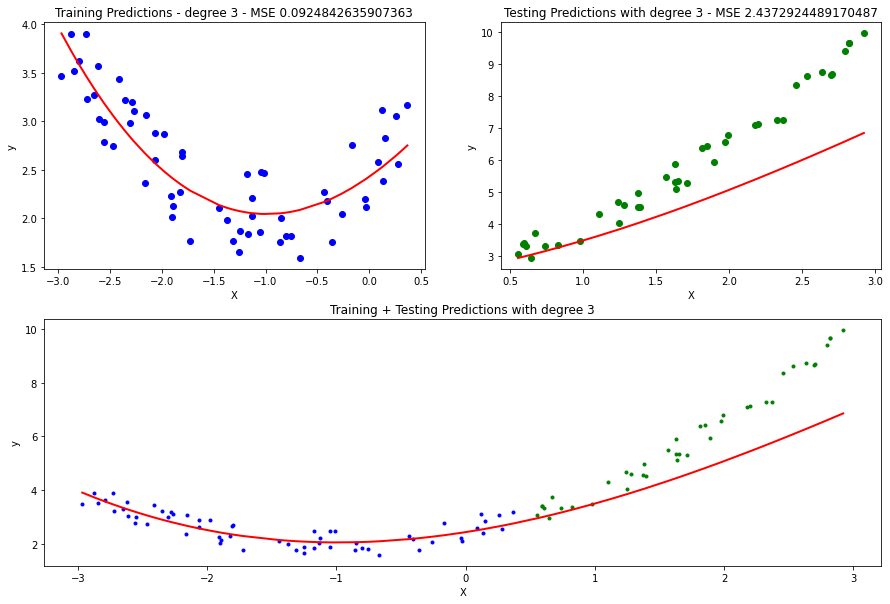

In [ ]:
run_ridge_and_plot(X_trn, y_trn, X_tst, y_tst, degree=3, lamb=1);

#### Lambda = 10

As lambda continues to increase we can see that ALL the weights slowly begin to approach zero except for the weight for the bias. As we do so, we begin to underfit more and more.

Train MSE: 0.11843291234590339
Test MSE: 24.02585305812337
degree: 3
X feature names: ['1' 'x0' 'x0^2' 'x0^3']
weight values: [ 2.33350022  0.24861431 -0.03295812 -0.10035836]


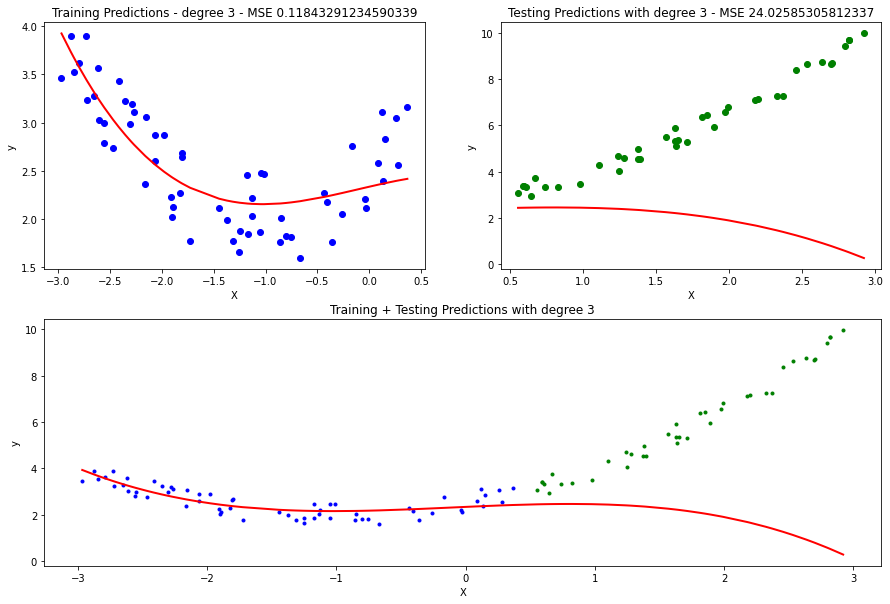

In [ ]:
run_ridge_and_plot(X_trn, y_trn, X_tst, y_tst, degree=3, lamb=10);

#### Lambda = 10000
If we set the lambda value to an extreme value, we can clearly see our model is encouraged to simply set all the coefficients except the bias near 0 - producing nearly a linear model (i.e., a straight line).

Train MSE: 0.26659761266437904
Test MSE: 17.690957218717465
degree: 3
X feature names: ['1' 'x0' 'x0^2' 'x0^3']
weight values: [ 2.44835443 -0.00115961  0.00497614 -0.01521565]


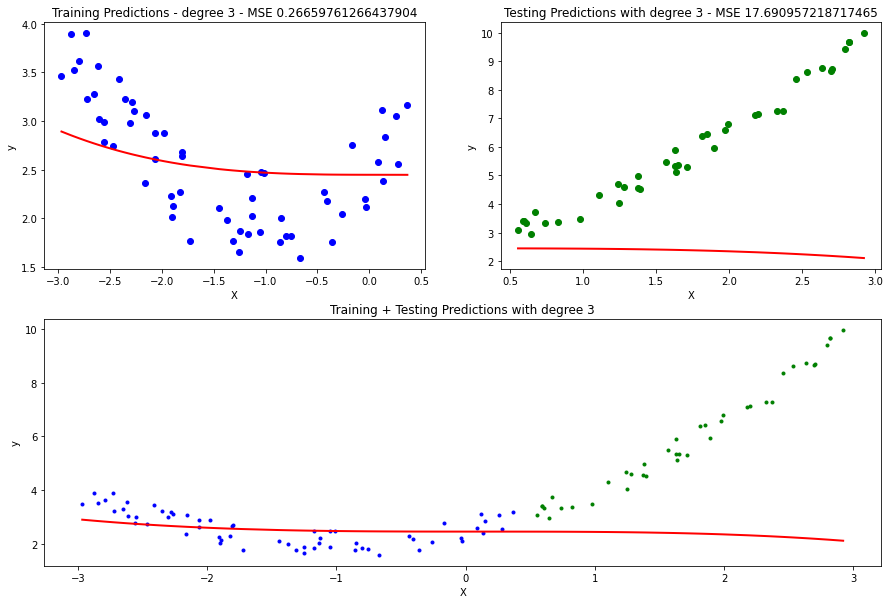

In [ ]:
run_ridge_and_plot(X_trn, y_trn, X_tst, y_tst, degree=3, lamb=10000);

## Regularization can only do so much

Note that regularization can only do so much. If we choose too complex of a model even regularization might not be able to fully solve our overfitting issues. We can see this in the below example output where our model is either overfitting or underfitting. Our best solution here would be to reduce the number of degrees and apply regularization!

Train MSE: 0.07119467869990101
Test MSE: 1693665526.6461704
degree: 10
X feature names: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']
weight values: [  2.5068443    1.1420002   -0.70148614   2.53688361  10.9235725
   2.61135339 -16.44515773 -19.53155742  -9.45582019  -2.15255799
  -0.19014205]


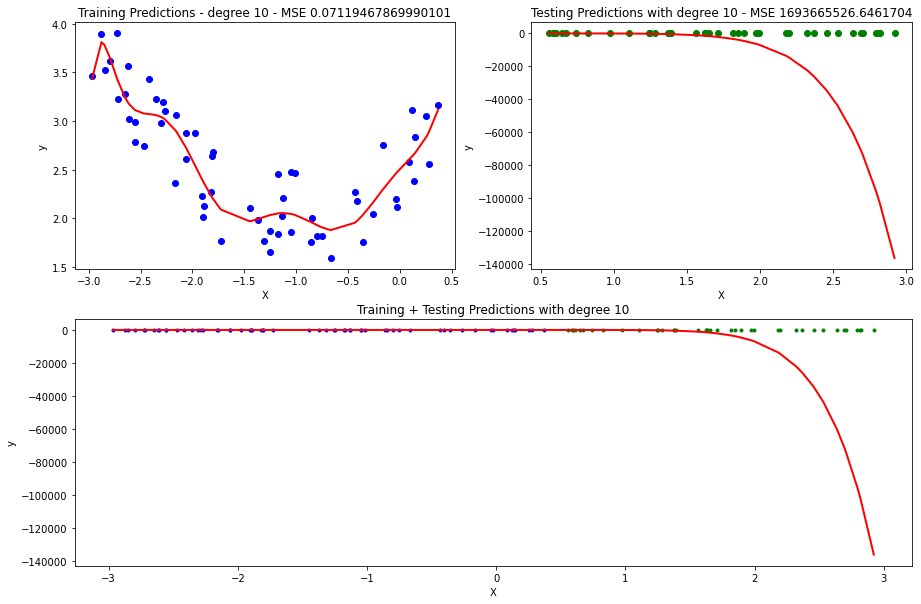

Train MSE: 0.08077113047939859
Test MSE: 1067405.4077061233
degree: 10
X feature names: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']
weight values: [ 2.47301724  1.15214436  0.67405482 -0.1746967  -0.12144184  0.28597114
  0.0637912  -0.32661438 -0.26673728 -0.07834478 -0.00812336]


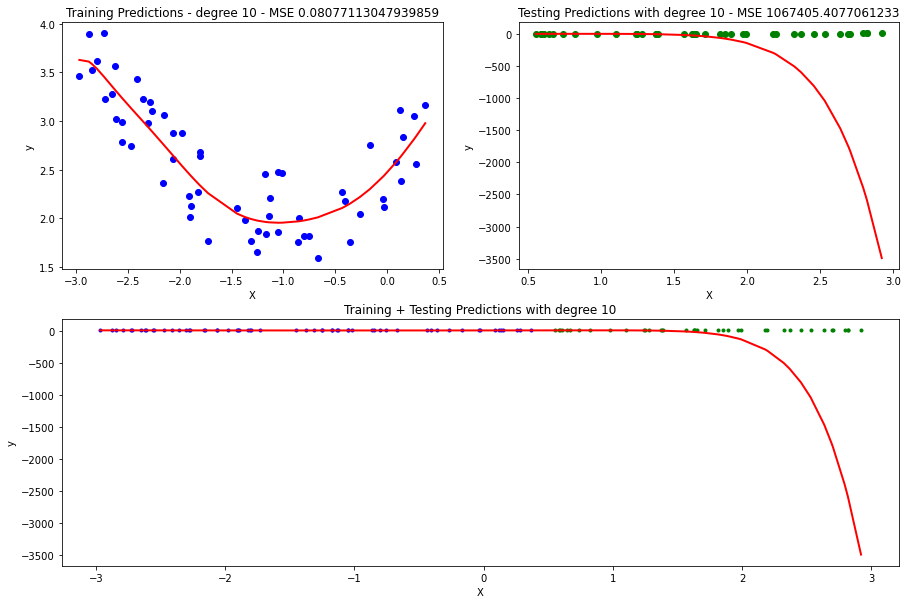

Train MSE: 0.0889113821524383
Test MSE: 66085.7170204055
degree: 10
X feature names: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']
weight values: [ 2.49072192  0.62291595  0.02491155  0.01273669  0.03311449 -0.02323392
  0.04333657 -0.02623553 -0.06123095 -0.02498452 -0.00311975]


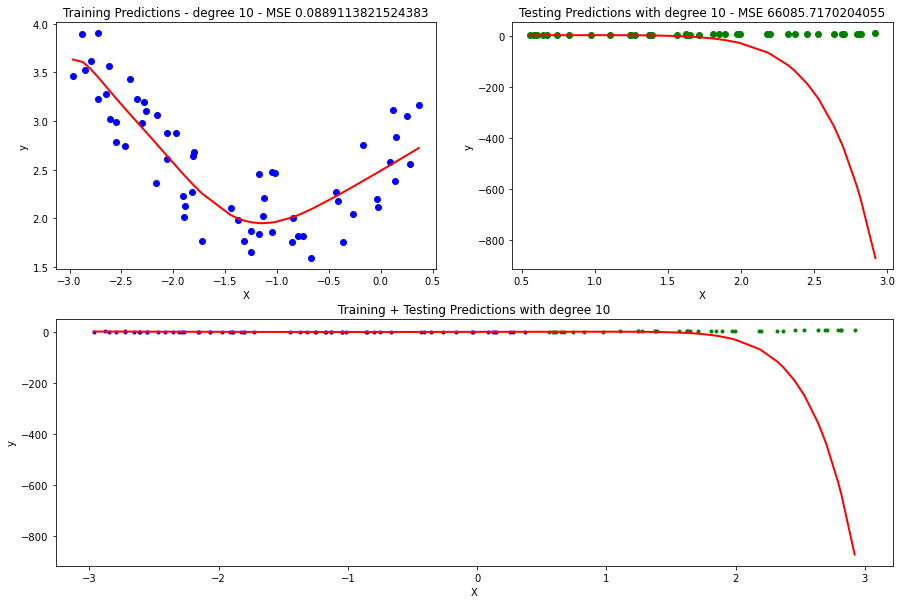

Train MSE: 0.10584445082699324
Test MSE: 10496.88753426811
degree: 10
X feature names: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']
weight values: [ 2.3967397   0.20732719 -0.0807481   0.06231683 -0.01666177 -0.01887509
  0.04092298 -0.02083956 -0.03094823 -0.00838429 -0.00061317]


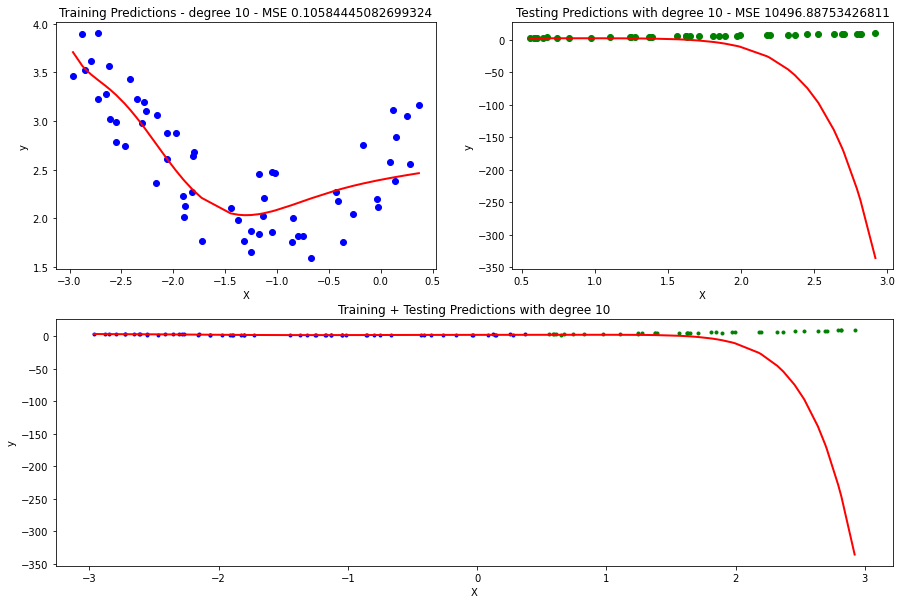

Train MSE: 0.1272212574949188
Test MSE: 4181.369060907916
degree: 10
X feature names: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']
weight values: [ 2.27993456  0.03848943 -0.02467957  0.0238     -0.01717955  0.0084029
  0.00329887 -0.01228646  0.00900707  0.00892712  0.00157919]


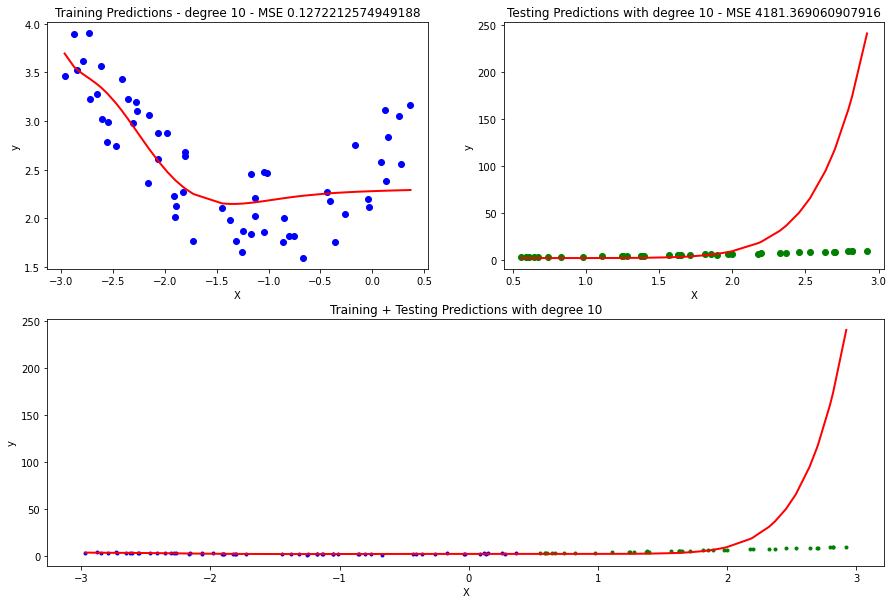

Train MSE: 0.1391501797731306
Test MSE: 287.54853564392744
degree: 10
X feature names: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']
weight values: [ 2.22146044  0.00485074 -0.00360036  0.00367449 -0.00289254  0.00142756
  0.00101099 -0.00353719  0.00339795  0.00260438  0.00038248]


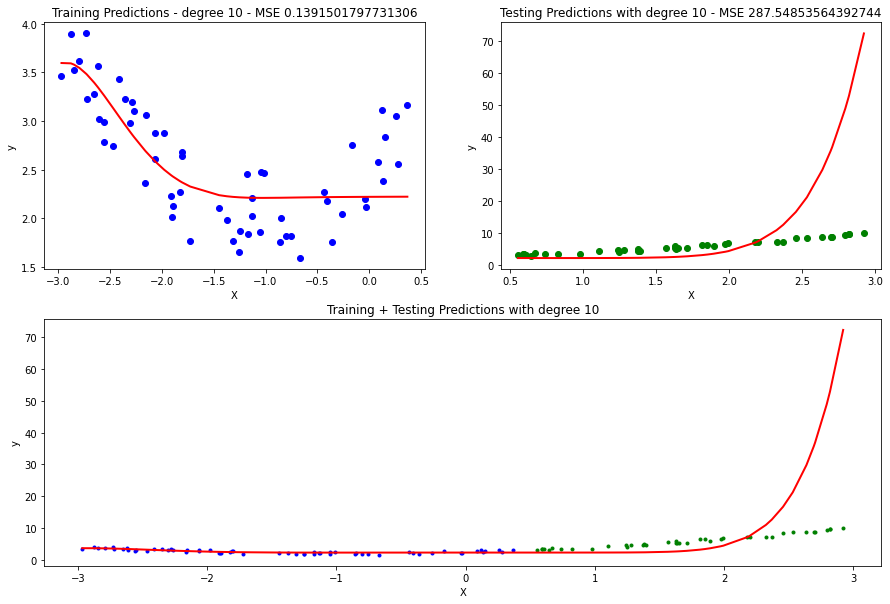

Train MSE: 0.14209348912214248
Test MSE: 8.934801861902764
degree: 10
X feature names: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']
weight values: [ 2.22086901  0.00046756 -0.00030583  0.00024499 -0.00004684 -0.00028971
  0.00078463 -0.0012462   0.00110462  0.00031333 -0.00005381]


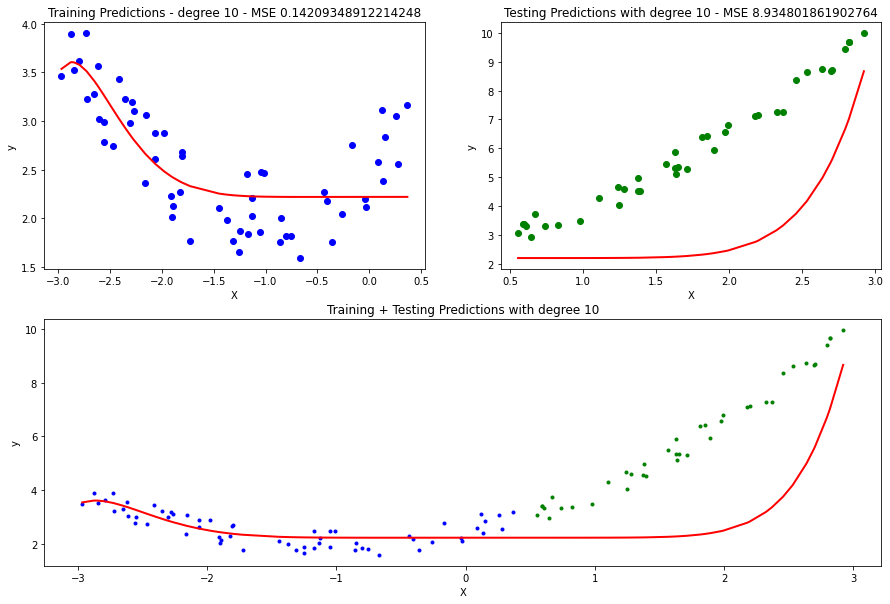

In [ ]:
lambdas = [0, .1, 1, 10, 100, 1000, 10000]
for l in lambdas:
    print("="*90)
    run_ridge_and_plot(X_trn, y_trn, X_tst, y_tst, degree=10, lamb=l);
    plt.show()

## What about Least Mean Squares (LMS)?

You might be asking, "Hey, how does this idea of regularization apply to LMS?" The idea is the same, we still want to minimize the below term

$$
J(\wv) = \min_\wv \frac{1}{2m} \sum_{i=1}^{m} \Big( f(\xv_i; \wv) - \hat{y}_i \Big)^2 + \frac{1}{2}\lambda \lVert \wv \rVert_2^2
$$
Taking the derivative like last week and only considering *online gradient descent* (one sample at a time) we get the following:

$$
\begin{align}
\nabla J(\wv_{k}) = \frac{\partial J(\wv_{k})}{\partial \wv_{k}} &= 
\frac{\partial }{\partial \wv_{k}} \frac{1}{2} \Big( f(\xv_i; \wv_{k}) - y_i \Big)^2 + \frac{1}{2} \lambda \lVert \wv_{k} \rVert_2^2 \\
\\
&= \Big( f(\xv_i; \wv_{k}) - y_i \Big) \frac{\partial }{\partial \wv_{k}} \Big( f(\xv_i; \wv_{k}) - y_i \Big) + \frac{1}{2}\lambda \wv_{k}^\top \wv_{k} \\
&= \Big( {\wv_{k}}^\top \xv_i - y_i \Big) \frac{\partial }{\partial \wv_{k}} \Big( {\wv_{k}}^\top \xv_i - y_i \Big)  + \frac{1}{2} \lambda \wv_{k}^\top \wv_{k} \\
\\
&= \Big( {\wv_{k}}^\top \xv_i - y_i \Big) \xv_i  + \frac{\partial }{\partial \wv_{k}} \frac{1}{2} \lambda \wv_{k}^\top \wv_{k}. \\
\\        
&= \Big( {\wv_{k}}^\top \xv_i - y_i \Big) \xv_i  + \lambda \wv_{k}.
\\
&= \Big( \hat{y}_i - y_i \Big) \xv_i  + \lambda \wv_{k}
\end{align}
$$

Note that $\frac{1}{2}$s are added for mathematical convenience to make the equation cleaner. 

Thus, our gradient will be as follows:

$$
\nabla J(\wv_{k}) = \Big( \wv^\top_k \xv_i - y_i \Big) \xv_i + \lambda \wv_{k}.
$$

Notice the only new term here $\lambda \wv_{k}$, everything else is the same as basic LMS! We can write the update equation for updating the weights as given below.
$$
\begin{align}
\wv_{k+1} &=  \wv_{k} - \alpha \nabla J(\wv_{k}) \\
&= \wv_{k} - \alpha \Big [ ( {\wv_{k}}^\top \xv_i - y_i) \xv_i  + \lambda \wv_{k}  \Big ] \\
\\
&= \wv_{k} - \alpha \Big [ ( \hat{y}_i - y_i) \xv_i  + \lambda \wv_{k}  \Big ]
\end{align}
$$


### **Mini-batch Gradient Descent**
In this week's lab, we'll look at how to implement LMS with regularization. Further, we will look at how to perform mini-batch gradient descent (GD). Meaning, we use only a **subset** of our data at a time to update the weights. 

Using mini-batches can allow for faster convergence and less variability in the weight updates compared to that of standard GD. This because using more samples gives use a better approximation of the *true gradient* (i.e., the gradient of ALL the data samples). Due to having less variability, we can also use larger learning rates as well. As we will see this idea of mini-batch GD will be crucial to neural network learning, therefore, we will differ in-depth explanations about it till we get to neural networks and deep learning.

The above ridge regression LMS equation is updated simply by adding the mean into the equation. This is because we only want to find the mean or **average gradient** of the mini-batch to update our weights! Notice, the regularization term is included in the mean as it is apart of the gradient.

$$
\begin{align}
\wv_{k+1} &=  \wv_{k} - \alpha \nabla J(\wv_{k}) \\
&= \wv_{k} - \alpha \Big [ \frac{1}{\text{mb}} \sum_{i=1}^{\text{mb}}( {\wv_{k}}^\top \xv_i - y_i) \xv_i  + \lambda \wv_{k}  \Big ]
\\
&= \wv_{k} - \alpha \Big [ \frac{1}{\text{mb}} \sum_{i=1}^{\text{mb}}( \hat{y}_i - y_i) \xv_i  + \lambda \wv_{k}  \Big ] \\
&= \wv_{k} - \alpha \Big [ \frac{1}{\text{mb}} ( \hat{\yv}_{\text{mb}} - \yv_{\text{mb}}) \Xm_{\text{mb}}  + \lambda \wv_{k}  \Big ] \\
&= \wv_{k} - \alpha \Big [ \frac{1}{\text{mb}} \Xm_{\text{mb}}^\top ( \hat{\yv}_{\text{mb}} - \yv_{\text{mb}})  + \lambda \wv_{k}  \Big ]
\end{align}
$$

where in this equation
- $\text{mb}$ refers to the number of samples in a given mini-batch (i.e., mini-batch size)
- $i$ now indexes to the current data sample in the mini-batch.
- $\wv_k$ is the current weight vector where each element corresponding to an input feature.
- $\wv_{k+1}$ indicates the weights after being updated using the current average gradient of the mini-batch.
- $\xv_i$ is the current data samples in the mini-batch.
- $y_i$ is the current target for the data sample in the mini-batch.
- $\alpha$ is the learning rate that determines how big of a step to take in the direction of the average gradient.
- $\lambda$ is the regularization term that determines how much the L2 norm should affect the cost function.
- $\yv_{\text{mb}}$ current mini-batch of labels
- $\hat{\yv}_{\text{mb}}$ current mini-batch of predictions
- $\Xm_{\text{mb}}$ current mini-batch of data samples

In order to fully converge to the OLS weights we will need to allow for a sufficient number of *epochs*. Recall that **one epoch refers to on full pass over the data**. Meaning, every sample has been used to update the weights once. How many epochs will be determine by our mini-batch size and learning rate, thus it is often treated as a hyperparamter as well.